# Manas Dhanuka; Homework 4

# Problem 1

In [351]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [392]:
def parent_gen(length_of_seq):
    '''This function takes in the length and generates random DNA sequence'''
    nucleotides = ['A','T','G','C']
    parent = ''
    
    for nt_num in range(length_of_seq):
        nt = random.choice(nucleotides)
        parent = parent + nt

    return parent

In [437]:
def mutation(parent_seq, mu):
    '''Takes in a string and generates either a mutant or a the same parent depending on probability of mutation
    passed in the function'''
    result = []
    
    mutant = ''
    for base_num in range(len(parent_seq)):

        rand_num = random.random()

        if rand_num > mu:

            mutant = mutant + parent_seq[base_num]

        elif rand_num < mu:
            if parent_seq[base_num] == 'A':

                if rand_num <= (mu/3) :
                    mutant += 'T'
                if rand_num > (mu/3) and rand_num < ((2*mu)/3):
                    mutant += 'G'
                if rand_num > ((2*mu)/3):
                    mutant += 'C'

            if parent_seq[base_num] == 'T':

                if rand_num <= (mu/3) :
                    mutant = mutant + 'A'
                if rand_num > (mu/3) and rand_num < ((2*mu)/3):
                    mutant += 'G'
                if rand_num > ((2*mu)/3):
                    mutant += 'C'

            if parent_seq[base_num] == 'G':

                if rand_num <= (mu/3) :
                    mutant = mutant + 'A'
                if rand_num > (mu/3) and rand_num < ((2*mu)/3):
                    mutant += 'T'
                if rand_num > ((2*mu)/3):
                    mutant += 'C'

            if parent_seq[base_num] == 'C':

                if rand_num <= (mu/3) :
                    mutant = mutant + 'A'
                if rand_num > (mu/3) and rand_num < ((2*mu)/3):
                    mutant += 'T'
                if rand_num > ((2*mu)/3):
                    mutant += 'G'
                
    return mutant

In [391]:
def PCR_cycles(parent_seq, num_of_cycles, mu):
    '''Takes in a parent sequnece and the number of cycles of PCR and returns list of all sequences obtained after the 
    specified number of PCR cycles'''
    all_sequences = [parent_seq]
    for n in range(num_of_cycles):
        new_strings = []
        for string in all_sequences:
            new_strings.append(mutation(string,mu))
        all_sequences += new_strings
    return all_sequences

In [247]:
def abundance(list_of_all_seq):
    '''Takes in list of all sequenecs and returns a dictionary with sequence as key and frequency as the corresponding'''
    freq_of_seq = {} 
    for seq in list_of_all_seq: 
        if (seq in freq_of_seq): 
            freq_of_seq[seq] += 1
        else: 
            freq_of_seq[seq] = 1

    return freq_of_seq

In [390]:
def entropy(dict_of_seqs, list_all_seqs):
    '''Calculates entropy of the sample provided. Takes in the dictionary created above and the list of all sequnces'''
    seq_freq = dict_of_seqs.values()
    probabilities = []
    for vals in seq_freq:
        probabilities.append((vals/len(list_all_seqs)))
    entropy = 0
    for p in probabilities:
        H_x = -((p)*(np.log10(p)))
        entropy = entropy + H_x
    return entropy

In [369]:
def N_eff(s):
    '''Calculates N effective, by taking in the entropy as a parameter'''
    n_effective = math.exp(s)
    return n_effective

## Case 1: µ = 10^−4

In [286]:
#Function calls
parent_DNA_1 = parent_gen(100)
all_seqs_1 = PCR_cycles(parent_DNA_1,13, mu=10**-4)
seq_dict_1= abundance(all_seqs_1)

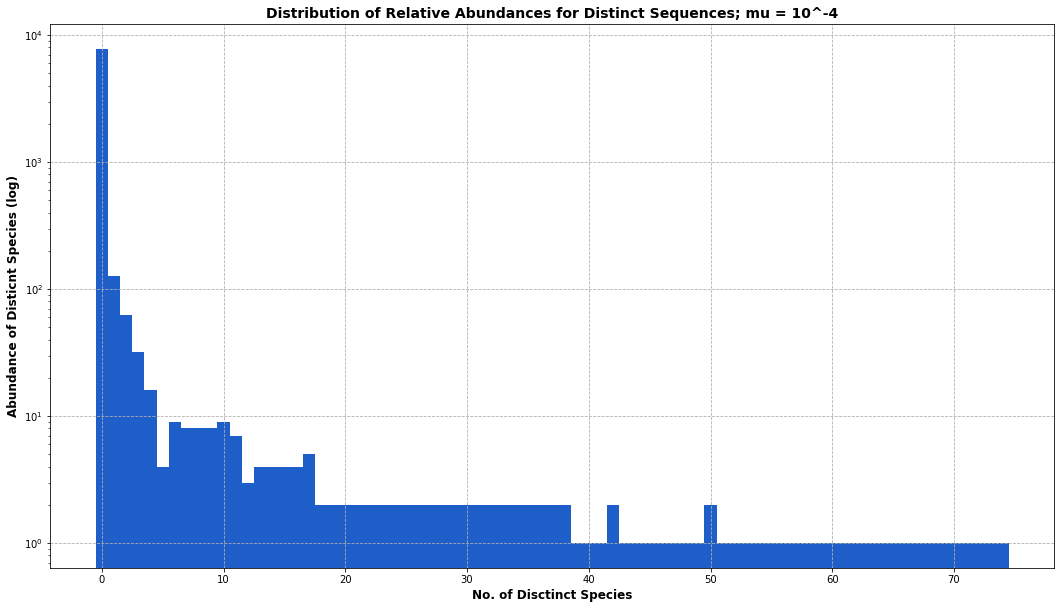

In [426]:
distinct_seqs_1 = list(seq_dict_1.keys())
frequency_1 = list(seq_dict_1.values())
plt.rcParams['figure.figsize'] = [18, 10] 
plt.title('Distribution of Relative Abundances for Distinct Sequences; mu = 10^-4', fontweight='bold', fontsize=14)
plt.xlabel('No. of Disctinct Species', fontweight='bold', fontsize=12)
plt.ylabel('Abundance of Disticnt Species (log)', fontweight='bold', fontsize=12)
plt.grid(linestyle='--')
plt.yscale('log')
plt.bar(range(len(distinct_seqs_1)),frequency_1, color = '#1E5EC9', width = 1)
plt.show()

### Entropy and N effective

In [423]:
S_1 = entropy(seq_dict_1,all_seqs_1)
print('The Entropy is:',"{:.2f}".format(S_1))
eff_species_1 = N_eff(S)
print('The effective number of species is:',"{:.2f}".format(eff_species_1))

The Entropy is: 0.15
The effective number of species is: 1.16


## Case 2: mu = 10^-3


In [431]:
#Function Calls
parent_DNA_2 = parent_gen(100)
all_seqs_2 = PCR_cycles(parent_DNA_2,13, mu=10**-3)
seq_dict_2= abundance(all_seqs_2)

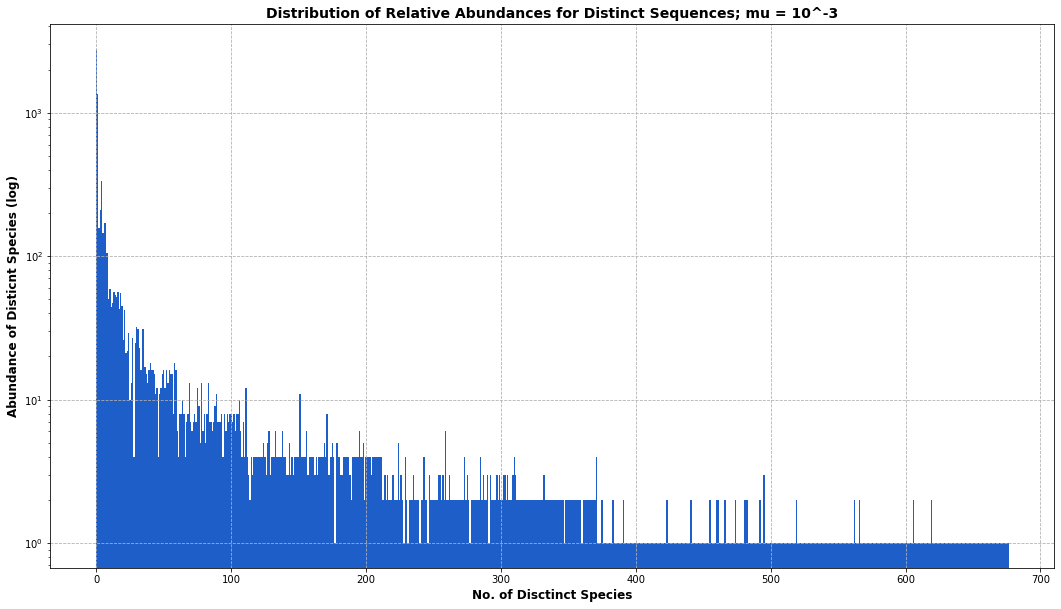

In [432]:
distinct_seqs_2 = list(seq_dict_2.keys())
frequency_2 = list(seq_dict_2.values())
plt.rcParams['figure.figsize'] = [18, 10]
plt.title('Distribution of Relative Abundances for Distinct Sequences; mu = 10^-3', fontweight='bold', fontsize=14)
plt.xlabel('No. of Disctinct Species', fontweight='bold', fontsize=12)
plt.ylabel('Abundance of Disticnt Species (log)', fontweight='bold', fontsize=12)
plt.grid(linestyle='--')
plt.yscale('log')
# plt.margins(x=0, y=10**-100)
plt.bar(range(len(distinct_seqs_2)),frequency_2, color = '#1E5EC9', width= 1)
plt.show()

### Entropy and N effective

In [421]:
S_2 = entropy(seq_dict_2,all_seqs_2)
print('The Entropy is:',"{:.2f}".format(S_2))
eff_species_2 = N_eff(S_2)
print('The effective number of species is:',"{:.2f}".format(eff_species_2))

The Entropy is: 1.33
The effective number of species is: 3.78


## Case 3: mu = 10^-2

In [433]:
#Function calls
parent_DNA_3 = parent_gen(100)
all_seqs_3 = PCR_cycles(parent_DNA_3,13, mu=10**-2)
seq_dict_3= abundance(all_seqs_3)

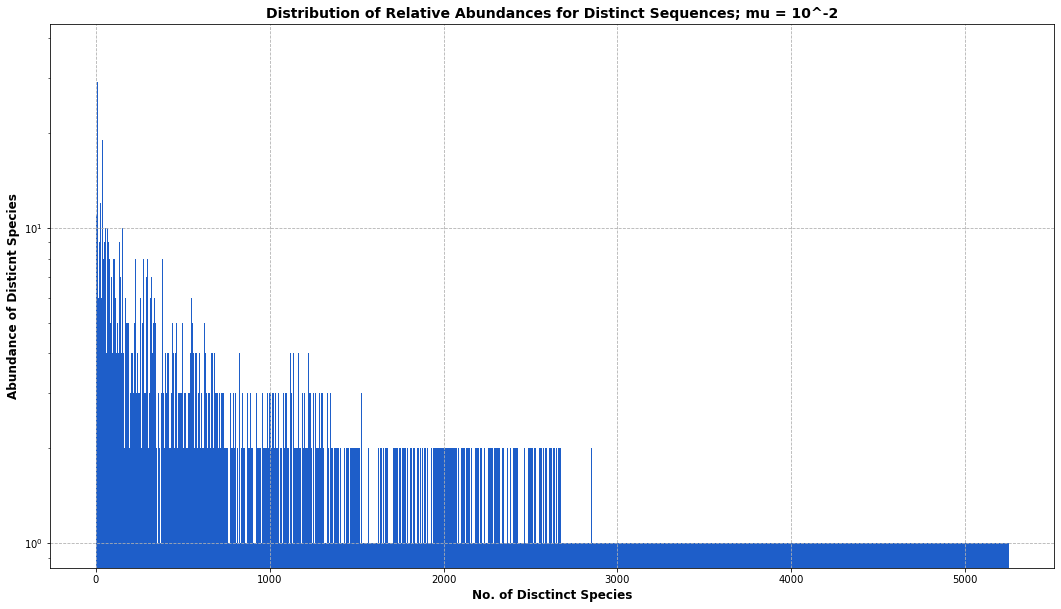

In [434]:
distinct_seqs_3 = list(seq_dict_3.keys())
frequency_3 = list(seq_dict_3.values())
plt.rcParams['figure.figsize'] = [18, 10] 
plt.title('Distribution of Relative Abundances for Distinct Sequences; mu = 10^-2', fontweight='bold', fontsize=14)
plt.xlabel('No. of Disctinct Species', fontweight='bold', fontsize=12)
plt.ylabel('Abundance of Disticnt Species', fontweight='bold', fontsize=12)
plt.grid(linestyle = '--')
plt.yscale('log')
plt.bar(range(len(distinct_seqs_3)),frequency_3, color = '#1E5EC9', width = 2)
plt.show()

### Entropy and N effective

In [419]:
S_3 = entropy(seq_dict_3,all_seqs_3)
print('The Entropy is:',"{:.2f}".format(S_3))
eff_species_3 = N_eff(S_3)
print('The effective number of species is:',"{:.2f}".format(eff_species_3))

The Entropy is: 3.59
The effective number of species is: 36.08


## Extra Credit

In [428]:
def multiple_PCR(sample_size,parent_length,num_of_cycles, mu):
    '''Function creates a sample for multiple reruns of the PCR eperiment and creates a list of number of number 
    of distinct sequnece for each PCR run'''
    samples = []
    for n in range(sample_size):
        parent_DNA = parent_gen(parent_length)
        all_seqs = PCR_cycles(parent_DNA,num_of_cycles,mu)
        seq_dict = abundance(all_seqs)
        num_distinct_seqs = len(list(seq_dict.keys()))
        samples.append(num_distinct_seqs)
    return samples      

In [429]:
def confidence_interval(sample):
    '''Calcultates confidence interval for a confidence level of 95%'''
    mean = sum(sample)/len(sample)
    z_stat = 1.96 
    s_dev = np.std(sample)
    CI_1 = mean - z_stat*(s_dev/(math.sqrt(len(sample))))
    CI_2 = mean + z_stat*(s_dev/(math.sqrt(len(sample))))
    
    return [CI_1, CI_2]    

#### Explain which distribution did you use, standard normal or t? Explain your choice

Ans)

The distribution used here is the Normal distribution, this distribution is plausible in this particular case as the sample we are finding the confidence interval of has a sample size of greater than 30.

### Confidence Interval for confidence level of 95%

In [424]:
sample = multiple_PCR(300,100,13,10**-4)
interval = confidence_interval(sample)
print('The confidence interval for a confidence level of 95% for expected distinct sequences is between',"{:.2f}".format(interval[0]),'and',"{:.2f}".format(interval[1]))

The confidence interval for a confidence level of 95% for expected distinct sequences is between 72.77 and 74.53
